In [4]:
import warnings
warnings.filterwarnings(action='ignore')

< 모델 평가와 성능 향상 >

지금까지 지도학습과 비지도 학습이론을 다루면서 다양한 머신러닝 알고리즘을 살펴봤다.
이제 모델 평가와 매개변수 선택에 대해 더 자세히 알아보자.

우리는 지도 학습 모델을 평가하기 위해 train_test_split 함수를 사용하여 데이터셋을 훈련세트와 테스트 세트로 나눴다.
그리고 모델을 만들기 위해 훈련세트에 fit 메서드를 적용했고, 모델을 평가하기 위해 테스트 세트에 score 메서드를 사용했다.
분류에서 score 메서드는 정확히 분류된 샘플의 비율을 계산하는 역할을 한다.

In [5]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 인위적인 데이터셋을 만듭니다
X, y = make_blobs(random_state=0)

# 데이터와 타깃 레이블을 훈련 세트와 테스트 세트로 나눕니다
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 모델 객체를 만들고 훈련 세트로 학습시킵니다
logreg = LogisticRegression().fit(X_train, y_train)

# 모델을 테스트 세트로 평가합니다
print("테스트 세트 점수: {:.2f}".format(logreg.score(X_test, y_test)))

테스트 세트 점수: 0.88


데이터를 훈련 세트와 테스트 세트로 나누는 이유는 지금까지 본 적 없는 새로운 데이터에 모델이 얼마나 잘 일반화되는지 측정하기 위해서였다.
모델이 훈련세트에 잘 맞는 것보다, 학습 과정에 없던 데이터에 대해 예측을 얼마나 잘 하느냐가 중요하다.

이번에는 평가 방법을 두가지 관점으로 확장해볼 것이다.
1. 안정적인 일반화 성능 측정 방법인 교차 검증
2. score 메서드가 제공하는 정확도와 R^2값 이외에 분류와 회귀 성능을 측성하는 방법.

< 교차 검증 >

교차 검증(cross-validation)은 일반화 성능을 재기 위해 훈련 세트와 테스트 세트로 한 번 나누는 것보다 더 안정적이고 뛰어난 동계적 평가 방법이다.
교차 검증에서는 데이터를 여러 번 반복해서 나누고 여러 모델을 학습한다.

가장 널리 사용되는 교차 검증 방법은 k-겹 교차검증(k-fold cross-validation)으로 k는 특정 숫자인데 보통 5또는 10을 사용한다.

5-겹 교차 검증을 하려면 데이터를 먼저 폴드(fold)라고 하는 비슷한 크기의 '부분 집합' 다섯개로 나눈다.
그런 다음 일연의 모델들을 만든다.

첫 번째 모델은 첫 번째 폴드를 테스트로 사용하고 나머지 2~5까지를 푼련 세트로 사용하여 학습한다.
두 번째 모델은 두 번째 폴드를 테스트로 사용하고 나머지 1,3~5까지를 푼련 세트로 사용하여 학습한다.

In [6]:
import mglearn
mglearn.plots.plot_cross_validation()

< scikit-learn의 교차 검증 >

scikit-learn에서 교차 검증은 model_selection 모듈의 cross_val_score 함수로 구현되어있다.
cross_val_score 함수의 매개변수는 평가하려는 모델과 훈련 데이터, 타깃 레이블이다.

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression()

scores = cross_val_score(logreg, iris.data, iris.target)
print("교차 검증 점수: {}".format(scores))
#cross_val_score의 기본값은 5-겹 교차 검증이므로 정확도 값이 3개가 반환된다.
#폴드의 수는 cv 매개변수를 사용해서 바꿀 수 있다.

교차 검증 점수: [0.96666667 1.         0.93333333 0.96666667 1.        ]


In [8]:
print("교차 검증 평균 점수: {:.2f}".format(scores.mean()))

교차 검증 평균 점수: 0.97


In [9]:
#3-겹 교차 검증
scores = cross_val_score(logreg, iris.data, iris.target, cv=2)
print("교차 검증 점수: {}".format(scores))

교차 검증 점수: [0.96 0.96]


In [10]:
print("교차 검증 평균 점수: {:.2f}".format(scores.mean()))

교차 검증 평균 점수: 0.96


In [11]:
#10-겹 교차 검증
scores = cross_val_score(logreg, iris.data, iris.target, cv=10)
print("교차 검증 점수: {}".format(scores))

교차 검증 점수: [1.         0.93333333 1.         1.         0.93333333 0.93333333
 0.93333333 1.         1.         1.        ]


In [12]:
print("교차 검증 평균 점수: {:.2f}".format(scores.mean()))

교차 검증 평균 점수: 0.97


In [13]:
from sklearn.model_selection import  cross_validate
res=cross_validate(logreg,iris.data,iris.target,cv=5,return_train_score=True)
display(res)

{'fit_time': array([0.01699066, 0.01999831, 0.01899004, 0.0179894 , 0.01798987]),
 'score_time': array([0.        , 0.        , 0.        , 0.00099897, 0.00099969]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]),
 'train_score': array([0.96666667, 0.96666667, 0.98333333, 0.98333333, 0.975     ])}

In [14]:
import pandas as pd
res_df=pd.DataFrame(res)
display(res_df)
print("평균시간과 점수: ",res_df.mean())

,fit_time,score_time,test_score,train_score
0,0.016991,0.000000,0.966667,0.966667
1,0.019998,0.000000,1.000000,0.966667
2,0.018990,0.000000,0.933333,0.983333
3,0.017989,0.000999,0.966667,0.983333
4,0.017990,0.001000,1.000000,0.975000


평균시간과 점수:  fit_time       0.018392
score_time     0.000400
test_score     0.973333
train_score    0.975000
dtype: float64


< 교차 검증의 장점 >

데이터를 훈련 세트와 테스트 세트로 한 번 나누는 것보다 교차 검증을 사용하면 몇 가지 장점이있다.

먼저 train_test_split는 데이터를 무작위로 나눈다.
데이터를 무작위로 나눌 떄 운좋게 훈련 세트에는 분류하기 어려운 샘플만 담기게 되었다고 생각해보자.

이 경우 테스트 세트에는 분류하기 쉬운 샘플만 들어 있어서 테스트 세트의 정확도는 비현실적으로 높게 나올 수 있다.

교차 검증을 사용하면 테스트 세트에 각 샘플이 정확하게 한 번씩 들어간다.
각 샘플은 폴드 중 하나에 속하며, 각 폴드는 한 번씩 테스트 세트가 된다.
그러기 때문에 모든 샘플에 대해 모델이 잘 일반화 된다.

train_test_split를 사용하면 보통 데이터 중 75%를 훈련세트로 사용하고 25%를 평가에 사용하낟.
5-겹 교차 검증을 사용하면 매 반복에서 80%의 데이터를 모델 학습에 사용한다.
이는 보통 더 정확한 모델을 만들어 낸다.

교차 검증의 주요 단점은 연산 비용이 늘어난다.
모델을 k개 만들어야 하므로 데이터를 한 번 나눴을 때 보다 대략 k배 더 느리다.

< 계층별 k-겹 교차 검증 >
데이터셋을 나열 순서대로 k개의 폴드로 나누는 것은 항상 좋지는 앉는다.

In [15]:
from sklearn.datasets import load_iris
iris = load_iris()
print("Iris 레이블:\n{}".format(iris.target))

Iris 레이블:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


결과에서 볼 수 있듯이
1/3은 클래스 0, 1/3은 클래스 1, 1/3은 클래스 2이다.

이 데이터에 3-겹 교차 검증을 적용한다고 생각해보자.
첫 번째 폴드는 클래스 0만 가지고 있으므로 정확도는 0이 된다.
두 번째, 세 번째도 같은 방법으로 정확도는 0이 된다.

단순한 k-겹 교차 검증에는 문제가 있으니, scikit-learn은 분류일 경우 이 방법 대신 계층별 k-겹 교차 검증을 사용한다.
계층별 교차 검증에서는 아래 그림과 같이 데이터를 나눈다.

[클래스 레이블 순서대로 정렬된 데이터에서 기본 교차 검증과 계층별 교차 검증의 비교]

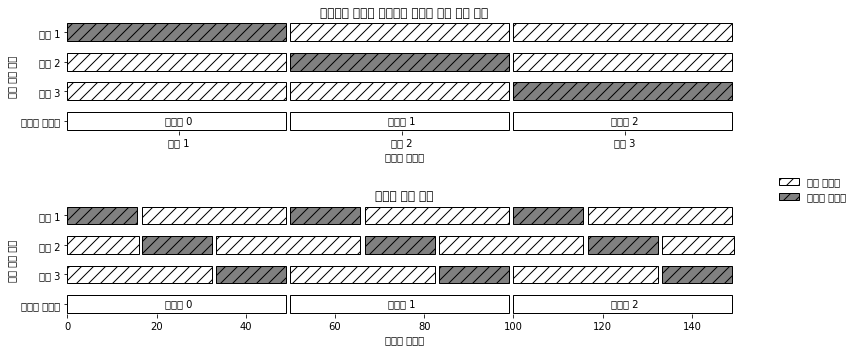

In [16]:
mglearn.plots.plot_stratified_cross_validation()

In [17]:
예를 들어 90%가 클래스 A, 10%가 클래스 B인 데이터라면, 계층별 교차 검증은 각 폴드에 9:1 비율대로 만든다.

분류기의 일반화 성능을 측정할 때 k-겹 교차 검증보다 더 안정적인 계층별 k-겹 교차 검증을 사용하는 것이 좋다.

SyntaxError: invalid syntax (<ipython-input-17-c2f6b6b4c81d>, line 1)

In [18]:
from sklearn.model_selection import KFold



kfold = KFold(n_splits=5) # KFold 객체 생성

logreg = LogisticRegression() # 모델 객체 생성



for n in [3, 5]:

    kfold = KFold(n_splits=n)

    scores = cross_val_score(logreg, iris.data, iris.target, cv=kfold)

    print('n_splits={}, cross validation score: {}'.format(n, scores))

n_splits=3, cross validation score: [0. 0. 0.]
n_splits=5, cross validation score: [1.         1.         0.86666667 0.93333333 0.83333333]


In [19]:
for n in [3, 5]:
    kfold = KFold(n_splits=n, shuffle=True, random_state=0)
    scores = cross_val_score(logreg, iris.data, iris.target, cv=kfold)
    print('n_splits={}, cross validation score: {}'.format(n, scores))

n_splits=3, cross validation score: [0.98 0.96 0.96]
n_splits=5, cross validation score: [1.         0.83333333 1.         1.         0.93333333]


LOOCVLeave-one-out cross-validation
LOOCV 교차 검증은 폴드 하나에 샘플 하나만 들어 있는 k-겹 교차 검증
각 반복에서 하나의 데이터 포인트를 선택해 테스트 세트로 사용
특히 데이터셋이 클 때는 시간이 매우 오래 걸리지만, 작은 데이터셋에서는 좋은 결과를 만들어냄

In [20]:
from sklearn.model_selection import LeaveOneOut, cross_val_score, KFold
iris = load_iris()
loo = LeaveOneOut()
scores_loo = cross_val_score(logreg, iris.data, iris.target, cv=loo) 

print('iris.data.shape \n{}'.format(iris.data.shape))

print('교차 검증 분할 횟수 \n{}'.format(len(scores_loo)))

print('평균 정확도 \n{:.3f}'.format(scores_loo.mean()))

iris.data.shape 
(150, 4)
교차 검증 분할 횟수 
150
평균 정확도 
0.967


In [21]:
import mglearn
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = 'c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family = font_name)
plt.rcParams['axes.unicode_minus'] = False # 축 -

shuffle-split cross-validation임의 분할 교차 검증

shuffle-split cross-validation에서는 
train_size만큼의 포인트로 train set를 만들고, test_size만큼(train set와 중첩되지 않는) 포인트로 test set를 만들도록 분할함
이 분할은 n_splits 횟수만큼 반복됨

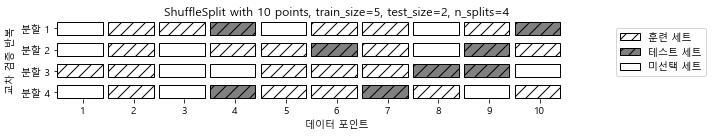

In [23]:
mglearn.plots.plot_shuffle_split()

10개의 데이터 포인트에 train_size=5, test_size=2와 n_splits=4를 적용한 ShuffleSplit

In [24]:
from sklearn.model_selection import ShuffleSplit
# create object
shuffle_split = ShuffleSplit(test_size=0.5, train_size=0.5, n_splits=10) # ShuffleSplit 객체 생성
# cv test
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
# cv test result
print('교차 검증 점수 \n{}'.format(scores))
print('교차 검증 점수 \n{}'.format(scores.mean()))

교차 검증 점수 
[0.94666667 0.96       0.96       0.97333333 0.94666667 0.96
 0.94666667 0.96       0.97333333 0.98666667]
교차 검증 점수 
0.9613333333333334


>> 임의 분할 교차 검증은 반복 횟수를 훈련 세트나 테스트 세트의 크기와 독립적으로 조절해야 할때 유용함
또한 train_size와 test_size의 합을 전체와 다르게 함으로써 전체 데이터의 일부만 사용할 수 있음
이렇게 데이터를 subsampling부분 샘플링방식은 대규모 데이터셋으로 작업할 때 유용함

그룹별 교차 검증

데이터 안에 매우 연관된 그룹이 있을 때도 교차 검증을 널리 사용함

<<얼굴 사진에서 표정을 인식하는 시스템을 만들기 위해 100명의 사진을 모았다고 가정>>

한 사람을 찍은 여러 장의 사진이 각기 다른 표정을 담고 있음 ==>
이 데이터셋에 없는 사람의 표정을 정확히 구분할 수 있는 분류기를 만드는 것이 목표

같은 사람의 사진이 훈련 세트와 테스트 세트에 모두 나타날 수 있으므로 그룹별 교차겸증을 하는것이 타당함

새 얼굴에 대한 일반화 성능을 더 정확하게 평가하려면
훈련 세트와 테스트 세트에 서로 다른 사람의 사진이 들어가도록 해야함

이를 위해 사진의 사람이 누구인지 기록한 배열을 
groups 매개변수로 전달 받을 수 있는 GroupKFold를 사용할 수 있음
groups 배열은 훈련 세트와 테스트 세트를 만들 때 분리되지 않아야 할 그룹을 지정하는 것이라 클래스 레이블과는 다름

데이터에 그룹에 있는 예로는 의료분야가 일반적
여기서는 같은 환자로부터 얻은 여러 샘플을 가지고 새로운 환자에게 일반화하는 것이 목적

비슷하게 음성 인식에서도 데이터셋에 같은 사람의 목소리가 여러 개 녹음되어 있을 수 있으며, 
관심사항은 새로운 사람의 대화를 인식하는 것

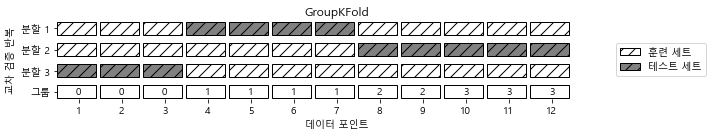

In [25]:
mglearn.plots.plot_group_kfold()

In [26]:
from sklearn.model_selection import GroupKFold
x, y = make_blobs(n_samples=12, random_state=0)
gkfold = GroupKFold(n_splits=3) # GroupKFold
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3] # group class
# cv test
scores = cross_val_score(logreg, x, y, groups, cv=gkfold)
# cv test result
print('교차검증 점수 \n{}'.format(scores))

교차검증 점수 
[0.75       0.6        0.66666667]


인위적으로 만든 데이터셋에 group 배열로 그룹을 지정하는 방법
데이터셋은 12개의 포인트로 이뤄져 있고 groups는 각 데이터 포인트에 대해 각 포인트가 어떤그룹(ex. 환자)에
속하는지를 나타냄
4개의 그룹을 나타내고 있으며 처음 3개의 샘플을 첫번째 그룹, 다음 4개는 두번째 그룹을 나타내는 식
샘플 데이터를 그룹으로 정렬할 필요는 없음

그리드 서치
매개변수를 튜닝하여 일반화 성능을 높이는 것이 목표입니다.
가장 널리 사용하는 방법은 grid search그리드 서치 이며
관심있는 매개변수들을 대상으로 가능한 모든 조합을 시도해보는 것입니다.

SVM의 경우 
커널의 폭에 해당하는 gamma와 규제 매개변수 C가 중요합니다.
매개변수 C와 gamma에 [0.001, 0.01, 0.1, 1, 10, 100] 값을 적용해보면
조합의 수는 총 6x6=36개가 나오며 모든 조합을 살펴보기 위해 SVM 매개변수 설정 테이블을 다음처럼 만들 수 있습니다.

In [27]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
iris = load_iris()
X_train, X_test, y_train, y_test = \
  train_test_split(iris.data, iris.target,
                    random_state=0)
print('훈련 세트의 크기 :{}, 테스트 세트의 크기:{}'.format(X_train.shape, X_test.shape))

훈련 세트의 크기 :(112, 4), 테스트 세트의 크기:(38, 4)


In [28]:
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        #매개변수의 각 조합에 대해SVC를 훈련시킵니다
        svm=SVC(gamma=gamma, C=C).fit(X_train, y_train)
        score = svm.score(X_test, y_test)
        if score > best_score:
            best_score = score
            best_param = {'C':C, 'gamma':gamma}
print('best score ==> {:.3f}'.format(best_score))

print('best parameter ==> {}'.format(best_param))

best score ==> 0.974
best parameter ==> {'C': 100, 'gamma': 0.001}


rid search를 통해 C=100, gamma: 0.001일 때 가장 좋은 결과가 나온 것을 확인할 수 있습니다.
이 결과를 보면 이 데이터셋에서 모델 정확도가 97.8%라고 보고할 수 있습니다.
하지만 이런 주장은 다음과 같은 이유로 잘못될 수도 있습니다.

1. 이 정확도는 새로운 데이터까지 이어지지 않을 수 있습니다.
매개변수를 조정하기 위해 테스트 세트를 이미 사용했기 때문에 테스트세트는 모델이 얼마나 좋은지 평가하는 데 사용할 수 없습니다.
즉 평가를 위해서는 모델을 만들 때 사용하지 않은 독립된 데이터셋이 필요하고 
다음 장에서 독립된 데이터셋을 다루는 방법을 살펴보겠습니다.

모델을 만들 때 사용하지 않은 독립된 데이터셋이 필요하다고 했습니다.

독립된 데이터셋을 사용하는 방법에는 2가지가 있습니다.

첫 번째는 train_test_split을 2번 사용하여 데이터를 3등분하는 것이고

두 번째는 cross-validation을 사용하는 것입니다.

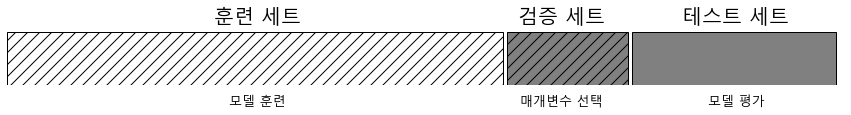

In [31]:
mglearn.plots.plot_threefold_split()

In [32]:
from sklearn.svm import SVC
iris = load_iris()
X_trainval, X_test, y_trainval, y_test=  train_test_split(iris.data, iris.target, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)  
print('훈련 세트의 크기:{}\n검증 세트의 크기:{}\n테스트 세트의 크기:{}'.format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

훈련 세트의 크기:84
검증 세트의 크기:28
테스트 세트의 크기:38


In [33]:
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        #매개변수의 각 조합에 대해SVC를 훈련시킵니다
        svm=SVC(gamma=gamma, C=C).fit(X_train, y_train)
        score = svm.score(X_valid, y_valid)
        if score > best_score:
            best_score = score
            best_param = {'C':C, 'gamma':gamma}
print('best score ==> {:.3f}'.format(best_score))
print('best parameter ==> {}'.format(best_param))

best score ==> 0.964
best parameter ==> {'C': 10, 'gamma': 0.001}


In [34]:
#훈련세트와 검증세트를 합쳐 모델을 다시 만든후
#테스트 세트를 사용해 평가한다
svm=SVC(**best_param).fit(X_trainval, y_trainval)
test_score=svm.score(X_test,y_test)
print('최적 매개변수 점수 ==> {:.3f}'.format(best_score))
print('최적 매개변수 ==> {}'.format(best_param))
print('최적 매개변수에서 test ==> {:.3f}'.format(test_score))

최적 매개변수 점수 ==> 0.964
최적 매개변수 ==> {'C': 10, 'gamma': 0.001}
최적 매개변수에서 test ==> 0.921


최적 매개변수에서 최고점수는 96.4%이며 테스트 세트 점수는 92.1%입니다. 
즉 새로운 데이터에 대해 92.1%만 정확하게 분류한다고 볼 수 있습니다.
테스트 세트로 둘 이상의 모델을 평가해서 그 중 더 나은 하나를 선택하는 것은 모델의 정확도를 매우 낙관적으로 추정하거나, overfitting이 생길 수 있으므로 주의해야합니다.

cross-validaion을 이용한 iris데이터의 grid search

일반화 성능을 더 잘 평가하려면 훈련 세트와 검증 세트를 한 번만 나누지 않고 
cross-validation을 사용해서 각 매개변수 조합의 성능을 평가할 수 있습니다.
cross-validation을 통해 어떤 매개변수가 선택되는지를 살펴보면

In [43]:
best_score=0
import numpy as np
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        #매개변수의 각 조합에 대해SVC를 훈련시킵니다
        svm=SVC(gamma=gamma, C=C)
        scores =cross_val_score(svm,X_trainval, y_trainval,cv=5)
        score=np.mean(scores)
        if score > best_score:
            best_score = score
            best_param = {'C':C, 'gamma':gamma}
svm=SVC(**best_param)
svm.fit(X_trainval,y_trainval)

SVC(C=10, gamma=0.1)

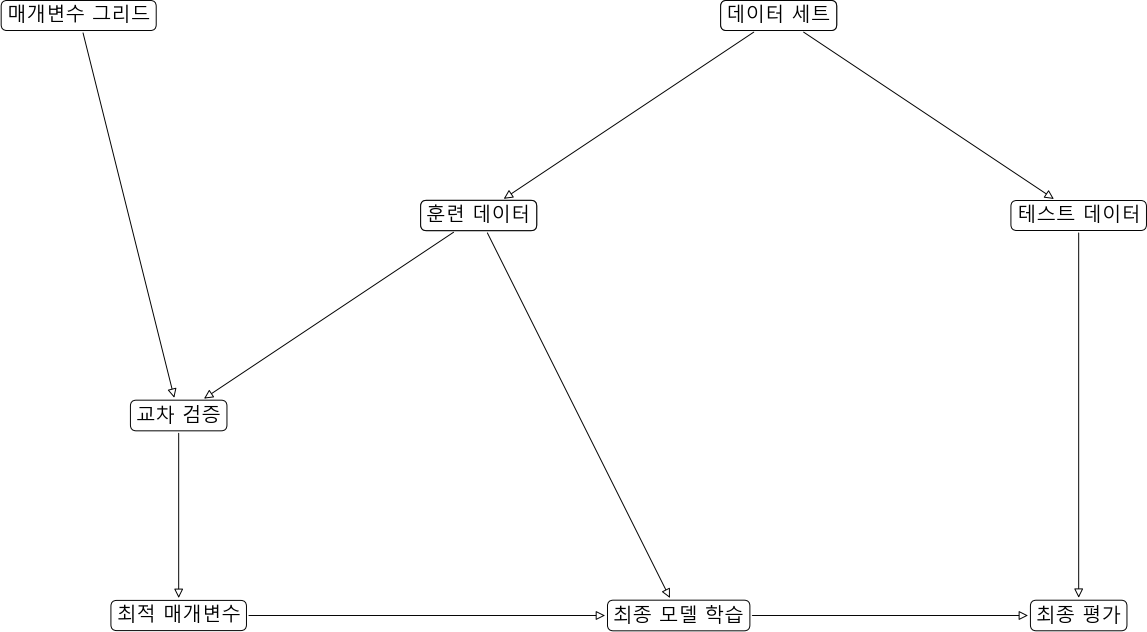

In [44]:
mglearn.plots.plot_grid_search_overview()

cross-validation을 사용한 grid search를 매개변수 조정 방법으로 많이 사용하기 때문에
scikit-learn은 GridSearchCV를 제공합니다.
GridSearchCV는 딕셔너리 형태로 검색 대상 매개변수를 지정하며 필요한 모든 모델을 학습합니다. 아래 소스는 위의 소스와 같은 결과를 냅니다.

In [46]:
param_grid={"C":[0.001, 0.01, 0.1, 1, 10, 100],
            "gamma":[0.001, 0.01, 0.1, 1, 10, 100]}
print("매개변수 그리드: \n",param_grid)

매개변수 그리드: 
 {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search=GridSearchCV(SVC(),param_grid,cv=5,return_train_score=True)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,random_state=0)

In [49]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [50]:
print("테스트 세트 점수 : {:.2f}".format(grid_search.score(X_train,y_train)))

테스트 세트 점수 : 0.99


In [51]:
print("테스트 세트 점수 : {:.2f}".format(grid_search.score(X_test,y_test)))

테스트 세트 점수 : 0.97


In [52]:
print("최적 매개변수:",grid_search.best_params_)
print("최고 교차 검증 점수:",grid_search.best_score_)

최적 매개변수: {'C': 10, 'gamma': 0.1}
최고 교차 검증 점수: 0.9731225296442687


In [53]:
print("최고 성능 모델:",grid_search.best_estimator_)

최고 성능 모델: SVC(C=10, gamma=0.1)


1. Error Type
테스트가 양성이면 건강, 음성 이면 암진단으로 생각할 수 있습니다.
모델이 항상 완벽하게 작동하는 것은 아니니, 잘못 분류할 때가 있습니다.

건강한 사람을 음성으로 분류하면 추가 검사를 받게 할 것이며 이를 false positive거짓 양성이라 합니다.
반대로 암에 걸린사람을 음성으로 분류하여 제대로 된 검사나 치료를 받지 못하게 할 수도 있습니다. 이는 위의 오류보다 더 치명적으로 다가옵니다. 이런 종류의 잘못된 예측은 false negative거짓 음성이라 합니다.
통계학에서 false positive를 type-I Error false negative를 type-II Error라고 합니다.
암진단에서는 false negative가 false positive보다 중요도가 높습니다.

2. imbalanced dataset불균형 데이터셋
이 두 종류의 에러는 두 클래스 중 하나가 다른 것보다 훨씬 많을 때 더 중요합니다.
어떤 아이템이 사용자에게 보여진 impression노출 데이터로 클릭을 예측하는 것입니다.
아이템은 광고일 수도 있고, 관련 기사나 기타 등등 여러가지 일 수도 있습니다.
목표는 특정 상품을 보여주면 사용자가 클릭을 할지(관심 대상인지)를 예측하는 것입니다.

사용자가 관심 있는 것을 클릭할 때까지 100개의 광고나 글을 보여줘야 한다면
이 때 클릭이 아닌 데이터 99개와 클릭 데이터 1개가 데이터셋으로 만들어집니다.

즉 샘플의 99%가 클릭 아님(음성), 1%가 클릭(양성) 클래스에 속합니다.
이렇게 한 클래스가 다른 것보다 훨씬 많은 데이터셋을 imbalanced datasets불균형 데이터셋이라고 합니다.

클릭을 99% 정확도로 예측하는 분류기를 만들었다고 하면 정확도는 꽤 높아보이지만 불균형 클래스를 고려하지 못했습니다.

즉 머신러닝 모델을 만들지 않고서도 무조건 '클릭 아님'으로 예측하면 그 정확도는 99%입니다.
이 말은 모델이 '좋은 모델', '무조건 클릭 모델' 중에 하나일 수 있다는 사실입니다.
따라서 정확도로는 이 둘을 구분하기가 어렵습니다.

예를 위해서 digits 데이터셋을 사용해 숫자 9를 다른 숫자와 구분해서 9:1의 불균형한 데이터셋을 만들어보겠습니다.

In [65]:
from sklearn.datasets import load_digits 
digits = load_digits() 
y = digits.target == 9 
# 0~8 FALSE 9 TRUE 
X_train, X_test, y_train, y_test = train_test_split( digits.data, y, random_state=0)

In [66]:
#항상 다수인 클래스 (여기서는 9아님)를 예측값으로
#내놓는 DummyClassifier를 사용해서 정확도를 계산해보면
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("예측된 레이블의 고유값: {}".format(np.unique(pred_most_frequent)))
print("테스트 점수: {:.2f}".format(dummy_majority.score(X_test, y_test)))

예측된 레이블의 고유값: [False]
테스트 점수: 0.90


학습하지 않고 90 % 얻음 
생각보다 높은 정확도를 가지고있다
그러나 문제에 따라서는 그저 무조건 한 클래스를 예측하기만 해도 될 수 있다

In [67]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("테스트 점수: {:.2f}".format(tree.score(X_test, y_test)))

테스트 점수: 0.92


정확도로만 보면 DecisionTreeClassifier가 더미 clssifier보다 조금 나을 뿐입니다.
비교를 위해 LogisticRegression과 기본 DummyClassifier clssifier 두 개를 더 살펴보겠습니다.

DummyClassifier는 무작위로 선택하므로 훈련 세트와 같은 비율의 예측값을 만듭니다.
DummyClassifier의 stategy의 기본값은 stratified로 클래스 레이블의 비율과 같은 비율로 예측 결과를 만들지만 타깃값 y_test와는 다르므로 정확도는 더 낮아집니다.

In [68]:
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("dummy 점수: {:.2f}".format(dummy.score(X_test, y_test)))

logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg 점수: {:.2f}".format(logreg.score(X_test, y_test)))

dummy 점수: 0.81
logreg 점수: 0.98


무작위로 예측하는 DummyClassifier는 결과가 안 좋습니다. 반면 LogisticRegression 은 매우 좋으나 DummyClassifier도 81.3%를 맞추었으므로 실제로 이 결과가 유용한지 판단하기가 매우 어렵습니다.
imbalanced datasets에서 예측 성능을 정량화하는 데 정확도는 적절한 측정 방법이 아니기 때문입니다.
특히 pred_most_frequent와 pred_dummy처럼, 빈도나 무작위 기반 예측보다 얼마나 더 나은지 알려주는 평가지표가 필요합니다.
모델을 평가하는 지표라면 이런 비상식적인 예측은 피할 수 있어야 합니다.

3. confusion matrix오차행렬

confusion matix오차행렬은 binary clssifier 평가 결과를 나타낼 때 가장 많이 사용하는 방법입니다.
LogisticRegression의 예측 결과를 confusion_matrix 함수를 사용해서 확인해보겠습니다.

In [69]:
from sklearn.metrics import confusion_matrix
pred_logreg = logreg.predict(X_test)
confusion = confusion_matrix(y_test, pred_logreg)
print('오차 행렬 \n{}'.format(confusion))

오차 행렬 
[[402   1]
 [  6  41]]


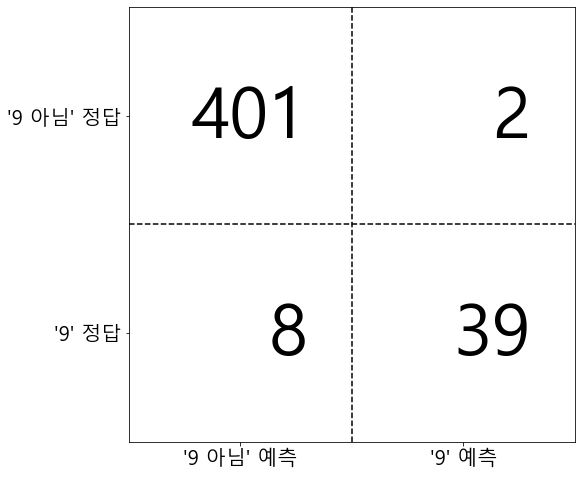

In [70]:
mglearn.plots.plot_confusion_matrix_illustration()

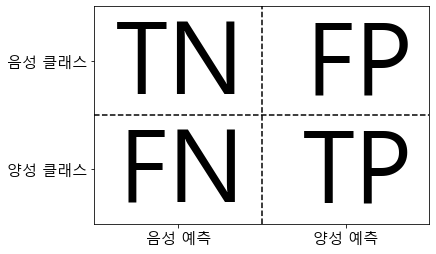

In [71]:
mglearn.plots.plot_binary_confusion_matrix()

In [72]:
print('빈도 기반 더미 모델')
print(confusion_matrix(y_test, pred_most_frequent))
print('\n무작위 더미 모델')
print(confusion_matrix(y_test, pred_dummy))
print('\n결정 트리')
print(confusion_matrix(y_test, pred_tree))
print('\n로지스틱 회귀')
print(confusion_matrix(y_test, pred_logreg))

빈도 기반 더미 모델
[[403   0]
 [ 47   0]]

무작위 더미 모델
[[365  38]
 [ 43   4]]

결정 트리
[[390  13]
 [ 24  23]]

로지스틱 회귀
[[402   1]
 [  6  41]]


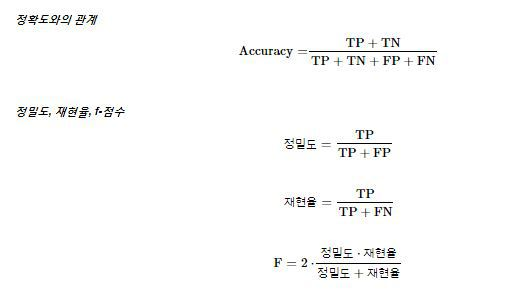

In [73]:
from sklearn.metrics import f1_score
print("반도 기반 더미 모델의 f1 score: {:.2f}".format(f1_score(y_test, pred_most_frequent)))
print("무작위 더미 모델의 f1 score: {:.2f}".format(f1_score(y_test, pred_dummy)))
print("트리 모델의 f1 score: {:.2f}".format(f1_score(y_test, pred_tree)))
print("로지스틱 회귀 모델의 f1 score: {:.2f}".format(f1_score(y_test, pred_logreg)))

반도 기반 더미 모델의 f1 score: 0.00
무작위 더미 모델의 f1 score: 0.09
트리 모델의 f1 score: 0.55
로지스틱 회귀 모델의 f1 score: 0.92


In [74]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent,
                            target_names=["9 아님", "9"]))

              precision    recall  f1-score   support

        9 아님       0.90      1.00      0.94       403
           9       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



불확실성 고려

confusion matrix와 classifier report는 예측 결과를 자세히 분석할 수 있도록 도와줍니다.
하지만 예측값은 model에 담긴 많은 정보가 이미 손실된 상태입니다.
대부분의 classifier는 확신을 가늠하기 위한 decision_function이나 predict_proba 메소드를 제공합니다.
예측을 만들어내는 것은 decision_function, predict_proba 출력의 critical value를 검증하는 것입니다.
binary search에서 decision_function은 0, predict_proba는 0.5를 critical value로 사용합니다.